In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("Income_train.csv")
print(train.shape)

(32561, 12)


In [3]:
train.head(10)

ID  Age         Workclass  Education         Marital.Status  \
0   1   39         State-gov  Bachelors          Never-married   
1   2   50  Self-emp-not-inc  Bachelors     Married-civ-spouse   
2   3   38           Private    HS-grad               Divorced   
3   4   53           Private       11th     Married-civ-spouse   
4   5   28           Private  Bachelors     Married-civ-spouse   
5   6   37           Private    Masters     Married-civ-spouse   
6   7   49           Private        9th  Married-spouse-absent   
7   8   52  Self-emp-not-inc    HS-grad     Married-civ-spouse   
8   9   31           Private    Masters          Never-married   
9  10   42           Private  Bachelors     Married-civ-spouse   

          Occupation   Relationship   Race     Sex  Hours.Per.Week  \
0       Adm-clerical  Not-in-family  White    Male              40   
1    Exec-managerial        Husband  White    Male              13   
2  Handlers-cleaners  Not-in-family  White    Male              40   
3  Handlers-cleaners        Husband  Black    Male              40   
4     Prof-specialty           Wife  Black  Female              40   
5    Exec-managerial           Wife  White  Female              40   
6      Other-service  Not-in-family  Black  Female              16   
7    Exec-managerial        Husband  White    Male              45   
8     Prof-specialty  Not-in-family  White  Female              50   
9    Exec-managerial        Husband  White    Male              40   

  Native.Country Income.Group  
0  United-States        <=50K  
1  United-States        <=50K  
2  United-States        <=50K  
3  United-States        <=50K  
4           Cuba        <=50K  
5  United-States        <=50K  
6        Jamaica        <=50K  
7  United-States         >50K  
8  United-States         >50K  
9  United-States         >50K

In [4]:
train['Income.Group'].value_counts()

<=50K    24720
>50K      7841
Name: Income.Group, dtype: int64

In [5]:
train['Workclass'].value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [6]:
#describing the continuous variables
train.describe()

ID           Age  Hours.Per.Week
count  32561.000000  32561.000000    32561.000000
mean   16281.000000     38.581647       40.437456
std     9399.695394     13.640433       12.347429
min        1.000000     17.000000        1.000000
25%     8141.000000     28.000000       40.000000
50%    16281.000000     37.000000       40.000000
75%    24421.000000     48.000000       45.000000
max    32561.000000     90.000000       99.000000

In [7]:
train.isnull().sum()

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
Income.Group      0
dtype: int64

In [8]:
#variable transformation
categories_to_combine = ['State-gov','Self-emp-inc','Federal-gov','Without-pay','Never-worked']

for cat in categories_to_combine:
    train['Workclass'].replace({cat:'Others'}, inplace = True)

In [9]:
train.Workclass.value_counts()

Private             24532
Others               3395
Self-emp-not-inc     2541
Local-gov            2093
Name: Workclass, dtype: int64

In [10]:
train.head()

ID  Age         Workclass  Education      Marital.Status  \
0   1   39            Others  Bachelors       Never-married   
1   2   50  Self-emp-not-inc  Bachelors  Married-civ-spouse   
2   3   38           Private    HS-grad            Divorced   
3   4   53           Private       11th  Married-civ-spouse   
4   5   28           Private  Bachelors  Married-civ-spouse   

          Occupation   Relationship   Race     Sex  Hours.Per.Week  \
0       Adm-clerical  Not-in-family  White    Male              40   
1    Exec-managerial        Husband  White    Male              13   
2  Handlers-cleaners  Not-in-family  White    Male              40   
3  Handlers-cleaners        Husband  Black    Male              40   
4     Prof-specialty           Wife  Black  Female              40   

  Native.Country Income.Group  
0  United-States        <=50K  
1  United-States        <=50K  
2  United-States        <=50K  
3  United-States        <=50K  
4           Cuba        <=50K

## Label Encoding for Categorical Variables

In [11]:
from sklearn.preprocessing import LabelEncoder
cat_var =train.dtypes.loc[train.dtypes == 'object'].index
le =LabelEncoder()
for var in cat_var:
    train[var] = le.fit_transform(train[var])

In [12]:
train.head()

ID  Age  Workclass  Education  Marital.Status  Occupation  Relationship  \
0   1   39          1          9               4           0             1   
1   2   50          3          9               2           3             0   
2   3   38          2         11               0           5             1   
3   4   53          2          1               2           5             0   
4   5   28          2          9               2           9             5   

   Race  Sex  Hours.Per.Week  Native.Country  Income.Group  
0     4    1              40              38             0  
1     4    1              13              38             0  
2     4    1              40              38             0  
3     2    1              40              38             0  
4     2    0              40               4             0

In [13]:
train.columns

Index(['ID', 'Age', 'Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Hours.Per.Week', 'Native.Country',
       'Income.Group'],
      dtype='object')

In [14]:
depv = 'Income.Group'
indepv = [x for x in train.columns if x not in ['ID',depv]]

In [15]:
train[depv]

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        1
9        1
10       1
11       1
12       0
13       0
14       1
15       0
16       0
17       0
18       0
19       1
20       1
21       0
22       0
23       0
24       0
25       1
26       0
27       1
28       0
29       0
        ..
32531    0
32532    1
32533    1
32534    0
32535    0
32536    1
32537    0
32538    1
32539    1
32540    0
32541    0
32542    0
32543    0
32544    0
32545    1
32546    0
32547    0
32548    0
32549    0
32550    0
32551    0
32552    0
32553    0
32554    1
32555    0
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Income.Group, Length: 32561, dtype: int64

In [16]:
train[indepv].head()

Age  Workclass  Education  Marital.Status  Occupation  Relationship  Race  \
0   39          1          9               4           0             1     4   
1   50          3          9               2           3             0     4   
2   38          2         11               0           5             1     4   
3   53          2          1               2           5             0     2   
4   28          2          9               2           9             5     2   

   Sex  Hours.Per.Week  Native.Country  
0    1              40              38  
1    1              13              38  
2    1              40              38  
3    1              40              38  
4    0              40               4

## Applying Machine Learning Model 

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train[indepv],train[depv])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
model.predict(train[indepv])

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Train Prediction

In [19]:
predicted_train = model.predict(train[indepv])
true_value = train[depv]

In [20]:
predicted_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Computing Accuracy (Model Evaluation)

In [21]:
from sklearn.metrics import accuracy_score
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 76.82%


## Tuning Hyperparameters

C - smaller values specifies stronger regularization .............
tol - tolerance limit for stopping criteria

In [22]:
model = LogisticRegression(C = 0.01, tol = 0.001, class_weight = "balanced",random_state = 42)
model.fit(train[indepv],train[depv])
predicted_train = model.predict(train[indepv])
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 66.71%


In [23]:
from sklearn.metrics import confusion_matrix,classification_report
print("Classification Report")
print (classification_report(true_value,predicted_train))
print ("Confusion matrix")
print (confusion_matrix(true_value,predicted_train))

Classification Report
             precision    recall  f1-score   support

          0       0.90      0.63      0.74     24720
          1       0.40      0.79      0.53      7841

avg / total       0.78      0.67      0.69     32561

Confusion matrix
[[15537  9183]
 [ 1658  6183]]


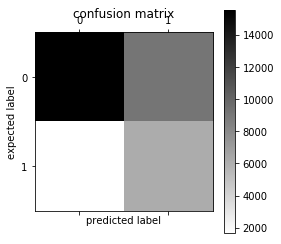

In [24]:
import matplotlib.pyplot as plt
plt.matshow(confusion_matrix(true_value,predicted_train), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

## Decision Trees

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
model = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 100, max_features = 'sqrt')
model.fit(train[indepv],train[depv])
predicted_train = model.predict(train[indepv])
true_value = train[depv]
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 81.34%


In [27]:
confusion_matrix(true_value,predicted_train)

array([[22307,  2413],
       [ 3664,  4177]], dtype=int64)

## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth = 20, min_samples_leaf = 50, max_features = 'sqrt',n_estimators = 1000)
model.fit(train[indepv],train[depv])
predicted_train = model.predict(train[indepv])
true_value = train[depv]
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 84.07%


KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors = 50)
model.fit(train[indepv],train[depv])
predicted_train = model.predict(train[indepv])
true_value = train[depv]
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 80.37%


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors = 100)
model.fit(train[indepv],train[depv])
predicted_train = model.predict(train[indepv])
true_value = train[depv]
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 79.40%


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors = 20)
model.fit(train[indepv],train[depv])
predicted_train = model.predict(train[indepv])
true_value = train[depv]
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 81.95%


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(train[indepv],train[depv])
predicted_train = model.predict(train[indepv])
true_value = train[depv]
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 85.74%


In [33]:
from sklearn.metrics import confusion_matrix,classification_report
print("Classification Report")
print (classification_report(true_value,predicted_train))
print ("Confusion matrix")
print (confusion_matrix(true_value,predicted_train))

Classification Report
             precision    recall  f1-score   support

          0       0.90      0.92      0.91     24720
          1       0.72      0.66      0.69      7841

avg / total       0.85      0.86      0.86     32561

Confusion matrix
[[22713  2007]
 [ 2637  5204]]


Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train[indepv],train[depv])
predicted_train = model.predict(train[indepv])
true_value = train[depv]
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 75.98%


In [35]:
from sklearn.metrics import confusion_matrix,classification_report
print("Classification Report")
print (classification_report(true_value,predicted_train))
print ("Confusion matrix")
print (confusion_matrix(true_value,predicted_train))

Classification Report
             precision    recall  f1-score   support

          0       0.89      0.78      0.83     24720
          1       0.50      0.68      0.58      7841

avg / total       0.79      0.76      0.77     32561

Confusion matrix
[[19370  5350]
 [ 2472  5369]]


In [22]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1, gamma=1) 
model.fit(train[indepv],train[depv])
predicted_train = model.predict(train[indepv])
true_value = train[depv]
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 75.92%


In [ ]:
model = SVC(kernel='poly', C=1, gamma=1) 
model.fit(train[indepv],train[depv])
predicted_train = model.predict(train[indepv])
true_value = train[depv]
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))